<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


**<h1> Manipulating Images </h1>**


Estimated time needed: **60** minutes


<h2>Objectives</h2>


In this lab, you will learn how to manipulate images, both as arrays and PIL image objects. You will learn how to copy an image to avoid aliasing. We will cover flipping images and cropping images. You will also learn to change pixel images; this will allow you to draw shapes, write text and superimpose images over other images.


<ul>
    <li><a href='#MI'>Manipulating Images </a>
        <ul>
            <li>Copying Images  </li>
            <li>Fliping Images </li>
            <li>Cropping an Image </li>
            <li>Changing Specific Image Pixels </li>
     
  
    
</ul>


----


Download the images for the lab:


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2023-02-19 04:48:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663451 (648K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 647.90K  --.-KB/s    in 0.05s   

2023-02-19 04:48:03 (13.8 MB/s) - ‘cat.png’ saved [663451/663451]

--2023-02-19 04:48:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data

We will be using these imported functions in the lab:


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Copying Images


If you want to reassign an array to another variable, you should use the `copy` method. 


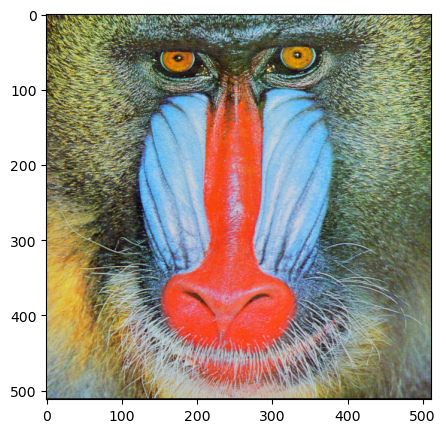

In [3]:
baboon = np.array(Image.open('baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()

If we do not apply the method `copy()`, the two variables would point to the same location in memory:


In [4]:
A = baboon

We use the  `id`  function to find a variable's memory address; we see the objects in the memory space which the variables `A` and `baboon` point to are the same.


In [5]:
id(A) == id(baboon)

True

However, if we apply method `copy()`, their memory addresses are different.


In [6]:
B = baboon.copy()
id(B)==id(baboon)

False

There may be unexpected behaviours when two variables point to the same object in memory. Consider the array `baboon`. If we set all its entries to zero, all entires in `A` will become zero as well. However, as `baboon` and `B` points to different objects, the values in `B` will not be affected. 


In [7]:
baboon[:,:,] = 0

We can compare the variables <code>baboon</code> and array <code>A</code>:


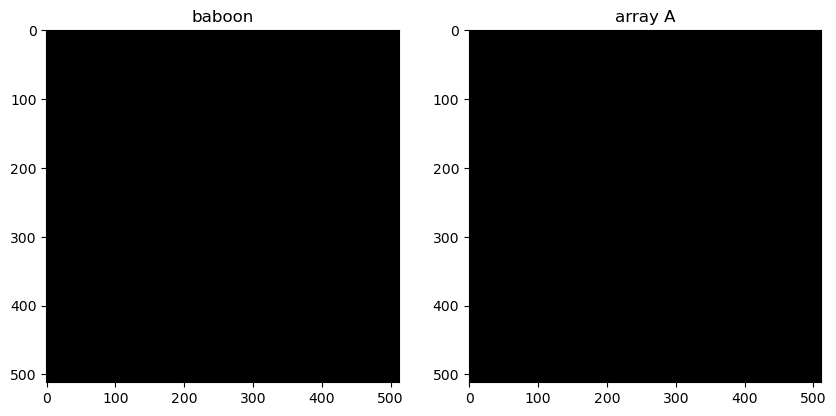

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

We see they are the same. This behaviour is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable. Variables are references to values on the memory. 

We can also compare <code>baboon</code> and array <code>B</code>:


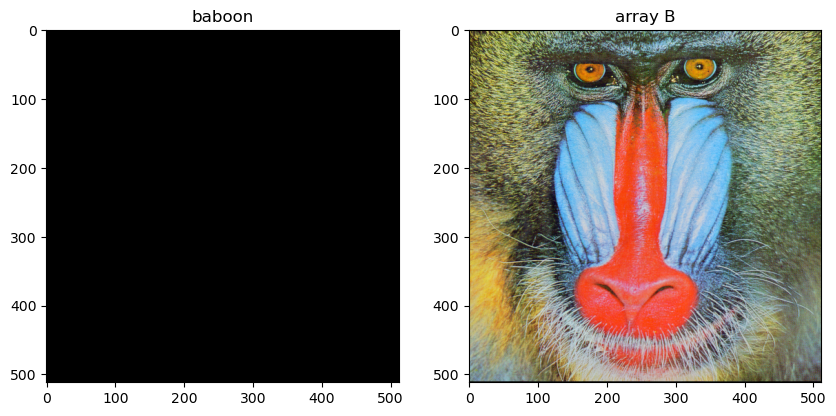

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()


If a PIL function does not return a new image, the same principle applies. We will go over some examples later on. 


## Flipping Images 


Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:


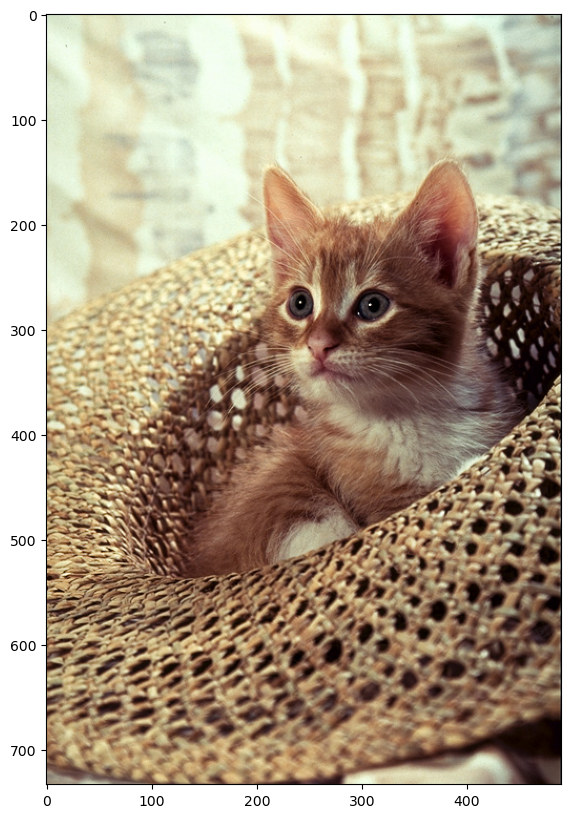

In [10]:
image = Image.open("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

We can cast it to an array and find its shape:


In [11]:
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 733 490 3


Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype <code>np.uint8</code>.


In [ ]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, `array_flip` will become the flipped image. 


In [ ]:
for i,row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

<code>PIL</code> has several ways to flip an image, for example, we can use the <code>ImageOps</code> module:


In [ ]:
from PIL import ImageOps

The `flip()` method of `ImageOps` module flips the image. The `mirror()` method will mirror  the image:


In [ ]:
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

In [ ]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

We can use  the <code>transpose()</code> method; the parameter is an integer indicating what type of transposition we would like to perform. For example, we can flip the image using a value of `1`.


In [ ]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show()

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following <code>dict</code>:


In [ ]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

We see the values are integers.


In [ ]:
flip["FLIP_LEFT_RIGHT"]

We can plot each of the outputs using the different  parameter values:


In [ ]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

 ## Cropping an Image


Cropping is the act of "cutting out" a part of an image and throwing out the rest. We can perform cropping using array slicing. 

Let start with a vertical crop: the variable `upper` is the index of the first row that we would like to include in the image, the variable `lower` is the index of the last row we would like to include. We then perform array slicing to obtain the new image. 


In [ ]:
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

Consider the array `crop_top`: we can also crop horizontally. The variable `right` is the index of the first column that we would like to include in the image and the variable `left` is the index of the last column we would like to include in the image.


In [ ]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

You can crop the PIL image using the <code>crop()</code> method, using the parameters from above Set the cropping area with <code>box=(left, upper, right, lower)</code>.


In [ ]:
image = Image.open("cat.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

We can also flip the new image:


In [ ]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

## Changing Specific Image Pixels


We can change specific image pixels using  array indexing; for example, we can set  all the green and blue channels in the original image we cropped to zero:


In [ ]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

We can compare the results with the new image. 


In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

We can also use the `ImageDraw` module from `PIL` library, which provides simple 2D graphics for Image objects 


In [ ]:
from PIL import ImageDraw 

We will copy the image object:


In [ ]:
image_draw = image.copy()

The draw constructor creates an object that can be used to draw in the given image. The input <code>im</code> is the image we would like to draw in.



In [ ]:
image_fn = ImageDraw.Draw(im=image_draw)

Whatever method we apply to the object <code>image_fn</code>, will change the image object <code>image_draw</code>.


We can draw a rectangle using the <code>rectangle</code> function, two important parameters include: <code>xy</code> – the coordinates bounding box  and <code>fill</code> – Color of the rectangle.


In [ ]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="red")

We can plot the image.


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

There are other shapes we can use. For example, we can also overlay text on an image: we use the ImageFont module to obtain  bitmap fonts.


In [ ]:
from PIL import ImageFont

We use the text method to place the text on the image. The parameters include `xy` (the top-left anchor coordinates of the text), the parameter `text` (the text to be drawn), and `fill` (the color to use for the text).


In [ ]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:


In [ ]:
image_lenna = Image.open("lenna.png")
array_lenna = np.array(image_lenna)

We can reassign the pixel values as follows:


In [ ]:
array_lenna[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_lenna)
plt.show()

In the same manner, the <code>paste()</code> method allows you to overlay one image over another, with the input being the image you would like to overlay. The parameter box is the left and upper coordinate of the image:


In [ ]:
image_lenna.paste(crop_image, box=(left,upper))

In [ ]:
plt.imshow(image_lenna)
plt.show()

We can see the method `copy()` applies to some <code>PIL</code> objects. We create two image objects, we set `new_image` to the `image`, and we use the method `copy()` for the `copy_image` object.


In [ ]:
image = Image.open("cat.png")
new_image=image
copy_image=image.copy()

Like the array, we see that the same memory address relationship exists. For example, if we don't use the method `copy()`, the image object has the same memory address as the original PIL image object. 


In [ ]:
id(image)==id(new_image)

If we use the method <code>copy()</code>, the address is different:


In [ ]:
id(image)==id(copy_image)

If we change the object <code>image</code>, <code>new_image</code> will change, but <code>copy_image</code> will remain the same:


In [ ]:
image_fn= ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="red")

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()

### Question 1:
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a PIL Image object called `im`, flip `im` and create an image called `im_flip`. Mirror `im` and create an image called `im_mirror`. Finally, plot both images.


In [ ]:
# write your script here


Double-click **here** for a hint.

<!-- The hint is below:

im_flip = ImageOps.flip(im)
im_mirror = ImageOps.mirror(im)

-->


Double-click **here** for the solution.

<!-- The answer is below:

im = Image.open("lenna.png")

im_flip = ImageOps.flip(im)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

im_mirror = ImageOps.mirror(im)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

-->


<h2>Authors</h2>


 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


 [Nayef Abou Tayoun](https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01) has a master of management in artificial intelligence degree, focusing on using machine learning and computer vision.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Pillow Docs</a>

[3]  <a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<h2>Change Log</h2>


<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>


Copyright © 2020 IBM Corporation. All rights reserved.
